### COMPSCI 527 - Spring 2020
## Homework 2
**Collaborators:**


> Haozhe Zhang

> Felipe Montano-Campos













## Problem 1

**Problem 1.1**

Let's recall that a two-dimensional kernel is separable if it can be expressed as the outer product of two vectors, hence we need to solve the following equation:

$$
\begin{pmatrix}w_1\\
w_2\\
w_3
\end{pmatrix}\times 
\begin{pmatrix}
r_1 &r_2&r_3
\end{pmatrix}=
\begin{pmatrix}
a &-2&b\\
c &3&d\\
2 &1&-4
\end{pmatrix}=H
$$

So we need to solve the following system of equation:

\begin{equation}
    w_1r_1=a \quad\quad \text{(1)}
\end{equation}

\begin{equation}
    w_1r_2=-2 \quad\quad \text{(2)}
\end{equation}

\begin{equation}
    w_1r_3=b \quad\quad \text{(3)}
\end{equation}

\begin{equation}
    w_2r_1=c \quad\quad \text{(4)}
\end{equation}

\begin{equation}
    w_2r_2=3 \quad\quad \text{(5)}
\end{equation}

\begin{equation}
    w_2r_3=d \quad\quad \text{(6)}
\end{equation}

\begin{equation}
    w_3r_1=2 \quad\quad \text{(7)}
\end{equation}

\begin{equation}
    w_3r_2=1 \quad\quad \text{(8)}
\end{equation}

\begin{equation}
    w_3r_3=-4 \quad\quad \text{(9)}
\end{equation}

If we combine (1), (7), (3), and (9) we get
$$
b = -2a
$$
If we combine (2), (5), (3), and (6) we get
$$
d = 3a
$$
If we combine (1), (4), (2) and (5) we get
$$
c= -\frac{3}{2}a
$$
Finally, if we combine (4), (7), (5) and (8) we get 
$$
c=6
$$


Substituting $c$ in all the previous expressions we get that $a=-4$, $b=8$, $c=6$ and, $d=-12$.



**Problem 1.2**

Compute the "valid" convolution $V$, "full" convolution $F$, and "same" convolution $S$ of image 
$$I=
\begin{pmatrix}
2 & -1 & 3\\
1 & 0 & 4 
\end{pmatrix} \quad \text{with the kernel} \quad
H=\begin{pmatrix}
1 & 0\\
2 & 1
\end{pmatrix}
$$

Let's recall that to calculate the convolution of $I$ we will have to flip the kernel 180 degrees
$$
\begin{pmatrix}
1 & 2\\
0 & 1
\end{pmatrix}
$$

and then, depending on how we define de image boundaries, we slice the kernel across the image, make a point-wise multiplication and sum the terms.


**The valid convolution**

The output consists only of those elements that do not rely on the zero-padding, hence we have:

$$
\begin{pmatrix}
2 & -1 & 3\\
1 & 0 & 4 
\end{pmatrix}\circledast
\begin{pmatrix}
1 & 2\\
0 & 1
\end{pmatrix}=
\begin{pmatrix}
0 & 9\\
\end{pmatrix}
$$

**The same convolution**

The output is the same size as the input image. As defined in the instruction we have:

$$
S_{-}=\begin{pmatrix}
0 & 0 & 0 & 0\\
0 & 2 & -1 & 3\\
0 & 1 & 0 & 4 
\end{pmatrix}\circledast
\begin{pmatrix}
1 & 2\\
0 & 1
\end{pmatrix}=
\begin{pmatrix}
2 & -1 & 3 \\
5 & 0 & 9
\end{pmatrix}
$$



$$
S_{+}=\begin{pmatrix}
 2 & -1 & 3 & 0\\
 1 & 0 & 4 & 0\\
0 & 0 & 0 & 0\\
\end{pmatrix}\circledast
\begin{pmatrix}
1 & 2\\
0 & 1
\end{pmatrix}=
\begin{pmatrix}
0 & 9 & 3 \\
1 & 8 & 4
\end{pmatrix}
$$

**The full covolution**

The output is the full discrete linear convolution of the inputs.


$$
\begin{pmatrix}
0 & 0 & 0 & 0 & 0\\
0 & 2 & -1 & 3 & 0\\
0 & 1 & 0 & 4 & 0\\
0 & 0 & 0 & 0 & 0\\
\end{pmatrix}\circledast
\begin{pmatrix}
1 & 2\\
0 & 1
\end{pmatrix}=
\begin{pmatrix}
2 & -1 & 3 & 0 \\
5 & 0 & 9 & 3\\
2 & 1 & 8 & 4
\end{pmatrix}
$$

**Problem 1.3**

A 10 by 15 image is convolved by "valid" convolution with a 2 by 3 non-separable kernel. How many multiplications are involved? Your final answer should be a single integer. 

**R.** Let's recall that per pixel we have about $mn$ operation, where in our particular case $m=2$, $n=3$, and we have $m-k+1=9*13=n-k+1$ pixels. So, the total number of multiplications is 702.

In [46]:
9*13*2*3

702

## Problem 2

**Problem 2.1**



In [47]:
import numpy as np
from skimage.filters import roberts_pos_diag, sobel_h, sobel_v, scharr_h, prewitt_v
import matplotlib.pyplot as plt

filter_list = [roberts_pos_diag, sobel_h, sobel_v, scharr_h, prewitt_v]

def kernel(f, max_h):
    kernel = np.zeros((2*max_h+1,2*max_h+1))
    kernel[int(((2*max_h+1+1)/2)-1),int(((2*max_h+1+1)/2)-1)]=1
    kernel_f = f(kernel)
    return(kernel_f)

def print_kernel(K, f=None):
    with np.printoptions(precision=3, floatmode='maxprec', suppress=True):
        if f is None:
            print(K, end='\n\n')
        else:
            print('{}:\n{}'.format(f.__name__, K), end='\n\n')
    
for f in filter_list:
    K = kernel(f, 2)
    if f == roberts_pos_diag:
      print_kernel(K[1:3,1:3], f)
    else:
      print_kernel(K[1:4,1:4], f)


roberts_pos_diag:
[[ 1.  0.]
 [ 0. -1.]]

sobel_h:
[[ 0.25  0.5   0.25]
 [ 0.    0.    0.  ]
 [-0.25 -0.5  -0.25]]

sobel_v:
[[ 0.25  0.   -0.25]
 [ 0.5   0.   -0.5 ]
 [ 0.25  0.   -0.25]]

scharr_h:
[[ 0.188  0.625  0.188]
 [ 0.     0.     0.   ]
 [-0.188 -0.625 -0.188]]

prewitt_v:
[[ 0.333  0.    -0.333]
 [ 0.333  0.    -0.333]
 [ 0.333  0.    -0.333]]



**Problem 2.2**

In [48]:
# from google.colab import files
# uploaded = files.upload()

In [81]:
import pickle

with open('test_cases.pickle', 'rb') as file:
    test_cases = pickle.load(file)

            

In [82]:
def matrix_A(image, k):
    shape_input = image.shape
    output_row = shape_input[0]-k+1
    output_column = shape_input[1]-k+1
    A = np.empty((0,k*k))
    for i in range(output_row):
        for j in range(output_column):
            row_up = i
            row_down =i+k
            column_left = j
            column_right = j+k
            scan_block = image[row_up:row_down, column_left:column_right]
            vector_block = np.transpose(scan_block.flatten())
            A = np.append(A, [vector_block], axis=0) 
    return(A)

In [83]:
for i in [0, 1,2,3]:
    A = matrix_A(test_cases[i][0], test_cases[i][2])
    b = test_cases[i][1].flatten()
    solution = np.linalg.lstsq(A,b,rcond=None)
    h = solution[0]
    H = np.reshape(h,(test_cases[i][2],test_cases[i][2]))
    H = np.rot90(H, k=2, axes=(0, 1))
    print_kernel(H)


[[1.]]

[[-1.  2.]
 [-0.  3.]]

[[ 3.  1.  5.]
 [-2. -0.  4.]
 [-0.  1. -3.]]

[[ 0.  1.  0.  1.]
 [ 1.  0.  1. -0.]
 [ 0.  1.  0.  1.]
 [ 1.  0.  1.  0.]]



## Problem 3

**Problem 3.1**

In [84]:
def gpdf(u, sigma):
    p = np.exp(-0.5*(u/sigma)**2)
    return p
def dgpdf(u, sigma):
    d = -(u/(sigma**2))*np.exp(-0.5*(u/sigma)**2)
    return d
def differentiation_kernels(sigma):
    h = int(np.ceil(3.5*sigma))
    X= list(range(-h, h+1))
    X = np.array(X)
    g = gpdf(X, sigma)
    g= [x/np.sum(g) for x in g]
    d = dgpdf(X, sigma)
    C = [x*dd for x, dd in zip(X, d)]
    c = -np.sum(C)
    d = [dd/c for dd in d]
    return g, d, X

In [85]:
g, d, X = differentiation_kernels(5)

In [86]:
import matplotlib
import matplotlib.pyplot as plt

Text(0.5, 0.98, '$\\sigma$=5')

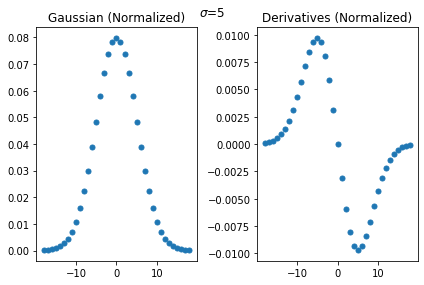

In [87]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(6, 4))
axes[0].plot(X, g, linestyle="", marker=".", markersize=10)
axes[1].plot(X, d, linestyle="", marker=".", markersize=10)
axes[0].set(title='Gaussian (Normalized)')
axes[1].set(title='Derivatives (Normalized)')
fig.tight_layout()
plt.suptitle("$\sigma$=5")


**Problem 3.2**

In [88]:
import imageio

In [89]:
Img = imageio.imread('shadow.png')

In [90]:
from scipy.signal import convolve2d

In [91]:
def gradient(image, sigma=2.):
    g, d, X = differentiation_kernels(sigma)
    d_x = np.expand_dims(d, axis=0)
    g_x = np.expand_dims(g, axis=1)
    d_y = np.expand_dims(d, axis=1)
    g_y = np.expand_dims(g, axis=0)
    semi_x = convolve2d(Img, d_x, 'same')
    I_x = convolve2d(semi_x, g_x, 'same')
    semi_y = convolve2d(Img, g_y, 'same')
    I_y = convolve2d(semi_y, d_y, 'same')
    return I_x, I_y
        

In [92]:
def magnitude(I_x, I_y):
    final = np.sqrt(I_x**2 + I_y**2)
    return final

In [93]:
I_x, I_y = gradient(Img)

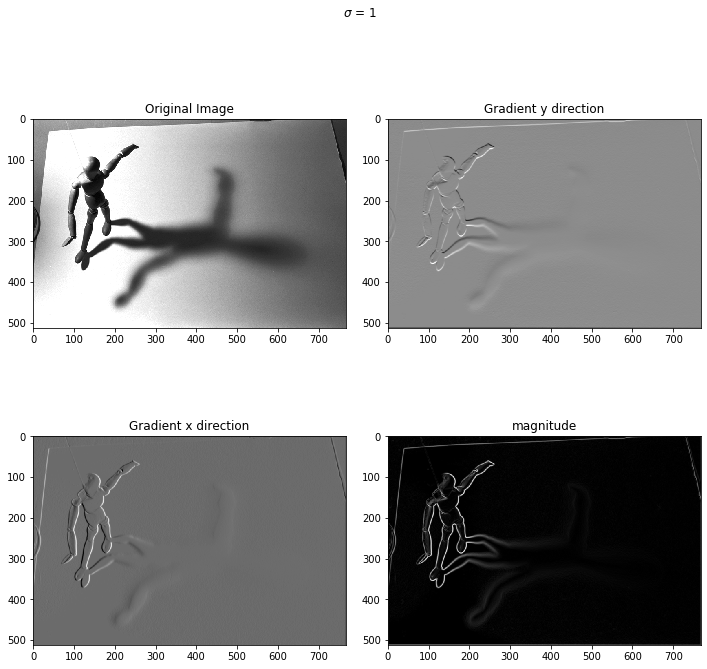

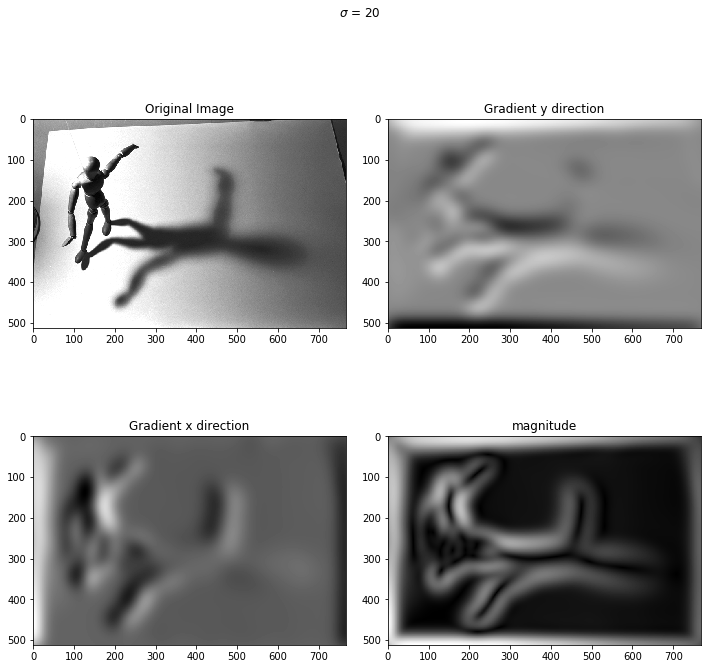

In [94]:
sigmas = [1, 20]
for sigma in sigmas:
    I_x, I_y = gradient(Img, sigma)
    mag = magnitude(I_x, I_y)
    fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(10,10))
    fig.tight_layout() 
    fig.suptitle("$\sigma$ = %s" %sigma)
    fig.subplots_adjust(top=0.88)
    axes[0,0].imshow(Img, cmap = plt.cm.gray)
    axes[1,0].imshow(I_x, cmap = plt.cm.gray)
    axes[0,1].imshow(I_y, cmap = plt.cm.gray)
    axes[1,1].imshow(mag, cmap = plt.cm.gray)
    axes[0, 0].set(title='Original Image')
    axes[1,0].set(title='Gradient x direction')
    axes[0, 1].set(title='Gradient y direction')
    axes[1,1].set(title='magnitude')
    fig.suptitle("$\sigma$ = %s" %sigma)

 **Problem 3.3 (Exam-Style)**

The reason why neither small $\sigma$ nor large $\sigma$ alone works is captured in the above graphs. The parameter $\sigma$ capture the size of the window of the kernel or, in other words, the smoothness of the kernel (i.e., the larger $\sigma$ the more smoothing the kernel is). As we can see when $\sigma=1$ the smoothness is very low so the kernel can not capture small changes in the pixels. For instance, in our image can not capture the shadow. On the other hand when $\sigma=9$ the smoothness is very high so the kernel captures small changes in the pixels but cannot properly capture sharp changes in the pixels.




**Problem 3.4**

In [95]:
def compare(a, b, name_a, name_b):
    def norm_diff(a, b):
        return np.linalg.norm(a.astype(float) - b.astype(float))

    d = norm_diff(a, b)
    print('The norm of the difference between {} and {} is {:.3g}'.format(name_a, name_b, d))

In [96]:
g, d, X = differentiation_kernels(20.)
gd = np.outer(g, d)
d_x = np.expand_dims(d, axis=0)
g_x = np.expand_dims(g, axis=1)

%timeit -n 1 -r 1 convolve2d(Img, gd, mode = 'valid')
%timeit -n 1 -r 1 convolve2d(convolve2d(Img, d_x, mode = 'valid'), g_x, 'valid')

naive = convolve2d(Img, gd, mode = 'valid')
separable = convolve2d(convolve2d(Img, d_x, mode = 'valid'), g_x, 'valid')

compare(naive, separable, 'naive', 'separable')

13.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
339 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
The norm of the difference between naive and separable is 1.46e-12


## Problem 4: Image Pyramids 

In [97]:
def shift(a, by=1):
    return np.right_shift(a, by)


def shrink_slow(a):
    s = a[:-1, :-1] + a[1:, :-1] + a[:-1, 1:] + a[1:, 1:]
    return shift(s, 2)[::2, ::2]

1.13 ms ± 101 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


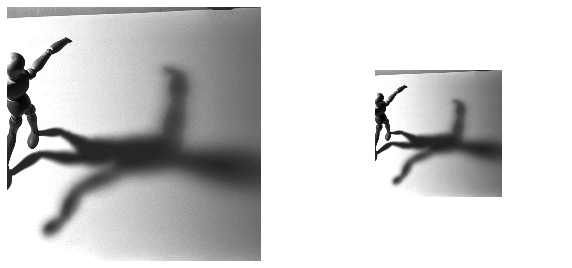

In [98]:

import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

image = imread("shadow.png")[:, 128:640].astype(int)

%timeit -n1000 -r3 shrink_slow(image)

fig = plt.figure(figsize=(10, 5))
xlim = ylim = (0, image.shape[0])
for img, subplot in ((image, 121), (shrink_slow(image), 122)):
    ax = fig.add_subplot(subplot)
    size = img.shape[0]
    lower = (image.shape[0] - size) // 2
    upper = lower + size
    extent = (lower, upper, lower, upper)
    ax.imshow(img, cmap=plt.cm.gray, extent=extent)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    plt.axis('off')
plt.show()

**Problem 4.1**

In [99]:
def shrink_faster(a):
    ss = a[:-1, :] + a[1:, :]
    s = ss[:, :-1] + ss[:,1:]
    return shift(s, 2)[::2, ::2]


In [100]:
slow_time = %timeit -n1000 -r3 -o shrink_slow(image)
faster_time = %timeit -n1000 -r3 -o shrink_faster(image)
print("The ratio of running times (slow/faster) is {:.3g}".format(slow_time.best/faster_time.best))
slow = shrink_slow(image)
fast = shrink_faster(image)
compare(slow, fast, 'slow', 'fast')

937 µs ± 14.8 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)
813 µs ± 9.52 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)
The ratio of running times (slow/faster) is 1.15
The norm of the difference between slow and fast is 0


As we can see the results of shrink_slow and shrink_faster above, we observe that the faster method is indeed faster than the slow one and the ratio between slow/faster is 1.15. This is because we explicitly took advantage of the kernel separability.

**Problem 4.2**

In [104]:
def shrink(a):
    s = a[:-1:2, :-1:2] + a[1::2, :-1:2] + a[:-1:2, 1::2] + a[1::2, 1::2]
    return shift(s, 2)

In [105]:
slow = %timeit -n1000 -r3 -o shrink_slow(image)
fast = %timeit -n1000 -r3 -o shrink_faster(image)
shrink = %timeit -n1000 -r3 -o shrink(image)
print("The ratio of running times (slow/faster) is {:.3g}".format(slow.best/fast.best))
print("The ratio of running times (slow/shrink) is {:.3g}".format(slow.best/shrink.best))
print("The ratio of running times (faster/shrink) is {:.3g}".format(fast.best/shrink.best))


1.84 ms ± 131 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)
1.04 ms ± 34.1 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)
389 µs ± 10.6 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)
The ratio of running times (slow/faster) is 1.7
The ratio of running times (slow/shrink) is 4.52
The ratio of running times (faster/shrink) is 2.66


In [106]:
def shrink(a):
    s = a[:-1:2, :-1:2] + a[1::2, :-1:2] + a[:-1:2, 1::2] + a[1::2, 1::2]
    return shift(s, 2)

slow_ = shrink_slow(image)
fast_ = shrink_faster(image)
shrink8 =  shrink(image)
compare(slow_, fast_, 'shrink_slow', 'shrink_faster')
compare(slow_, shrink8, "shrink_slow", "shrink")

The norm of the difference between shrink_slow and shrink_faster is 0
The norm of the difference between shrink_slow and shrink is 0


As we can see from our results, we get the slowest time when we use the shrink method provided by the instructions, shrink_slow. We get a faster result when we take advantage of the separability of the kernel, shrink_faster. And finally, we get the fastest time by only computing the pixels that we do care, shrink. As seen above, the ratio of computational time between slow and faster is 1.7 and the ratio of computational time between faster and shrink is 2.66.

**Problem 4.3**

In [107]:
def number_of_levels(img):
    assert issubclass(img.dtype.type, np.integer), 'Pixel values must be integer'
    assert len(img.shape) == 2, 'Image must be gray-level'
    rows, cols = img.shape
    assert rows == cols, 'Image must be square'
    n = np.round(np.log2(rows)).astype(int)
    assert 2 ** n == rows, 'Number of rows and columns must be a power of 2'
    return n

In [108]:
def make_pyramid(img):
    n = number_of_levels(img)
    plist=[img]
    temp_img = img
    for i in range(n):
        temp_img = shrink(temp_img)
        plist.append(temp_img)
    return plist

In [109]:
def composite(p):
    R, c_0 = p[0].shape
    c_1 = p[1].shape[1]
    C = c_0 + c_1
    comp = np.full((R, C), 255)
    comp[:, :c_0] = p[0]
    row_s = 0
    col_s = c_0
    for i in range(1, len(p)):
        row_e = row_s + p[i].shape[0]
        col_e = col_s + p[i].shape[1]
        comp[row_s:row_e, col_s: col_e ] = p[i]
        row_s = row_e
    return comp
    

In [110]:
p = make_pyramid(image)

In [111]:
pyramid = composite(p)

(-0.5, 767.5, 511.5, -0.5)

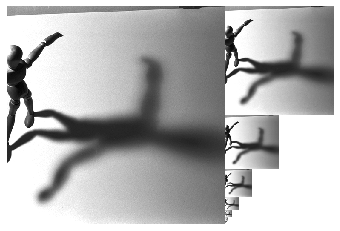

In [112]:
plt.imshow(pyramid, cmap = plt.cm.gray)    
plt.axis('off')

**Problem 4.4 (Exam-Style)**

$$area = 1 + r^2 + r^4 + ... + r^{2n}$$

 where n goes to infinity we can re-writte the expression as:

\begin{align*}
area &= 1+(r^{2})^{1}+(r^{2})^{2}+(r^{2})^{3}+(r^{2})^{4}......+(r^{2})^{\infty}\\
&=\sum_{i=0}^{\infty}(r^{2})^{i}
\end{align*}


Since we have and infinite geometric series, the equation above converges to 
$$ area = \frac{1}{1-r^2}$$

In [113]:
r = 0.5
area_1 = 1/(1-0.5**2)
r = 0.75
area_2 = 1/(1-0.75**2)

In [114]:
print(area_1)
print(area_2)

1.3333333333333333
2.2857142857142856


From the above results, we know the area of  $𝑟=\frac{1}{2}$  is about 1.33 and the area of  $r=\frac{3}{4}$  is about 2.29.